In [33]:
# ==============================
# DATA CLEANING
# ==============================


# Import library yang digunakan
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Memuat dataset asma
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/asthma_dataset.csv", sep=';')

print("Jumlah baris & kolom:", df.shape)
display(df.head())

# =========================
# CEK DATA DUPLIKAT
# =========================
duplikat = df.duplicated().sum()
print("\nJumlah data duplikat:", duplikat)

df = df.drop_duplicates()
print("Ukuran data setelah hapus duplikat:", df.shape)

# Hapus duplikasi dan simpan hasil di variabel baru
df_no_dupe = df.drop_duplicates()
print("Ukuran data setelah hapus duplikasi:", df_no_dupe.shape)

df_no_dupe.to_csv("/content/ASMAdataset_no_duplicates.csv", index=False)
print("File sudah disimpan: ASMAdataset_no_duplicates.csv")



Jumlah baris & kolom: (5400, 16)


,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,ASTH101290,57,Female,25.2,Never,1,Pollen,Moderate,Sedentary,Indoor,Never,0.17,0,332.8,5.0,1
1,ASTH103034,59,Other,29.2,Former,0,Never,Moderate,Sedentary,Outdoor,Never,0.46,0,333.3,29.6,0
2,ASTH101757,32,Female,30.3,Current,0,Never,Moderate,Sedentary,Indoor,Diabetes,0.62,2,446.3,26.1,0
3,ASTH109783,3,Female,22.5,Never,0,Pollen,High,Moderate,Indoor,Never,0.71,0,327.5,23.0,0
4,ASTH101067,6,Male,24.5,Never,0,Pollen,High,Sedentary,Indoor,Diabetes,0.57,1,248.0,18.1,1



Jumlah data duplikat: 600
Ukuran data setelah hapus duplikat: (4800, 16)
Ukuran data setelah hapus duplikasi: (4800, 16)
File sudah disimpan: ASMAdataset_no_duplicates.csv


In [34]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ASMAdataset_no_duplicates.csv" , sep=';')

print("Jumlah baris & kolom:", df.shape)
df.head()

# =========================
# CEK MISSING VALUE
# =========================
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

print("\nTotal missing value:")
print(df.isnull().sum().sum())



Jumlah baris & kolom: (4800, 16)

Jumlah missing value per kolom:
Patient_ID                 0
Age                        0
Gender                     0
BMI                        0
Smoking_Status             0
Family_History             0
Allergies                  0
Air_Pollution_Level        0
Physical_Activity_Level    0
Occupation_Type            0
Comorbidities              0
Medication_Adherence       0
Number_of_ER_Visits        0
Peak_Expiratory_Flow       0
FeNO_Level                 0
Has_Asthma                 0
dtype: int64

Total missing value:
0


Jumlah baris mengandung outlier: 34

=== Grafik distribusi & outlier SEBELUM capping ===


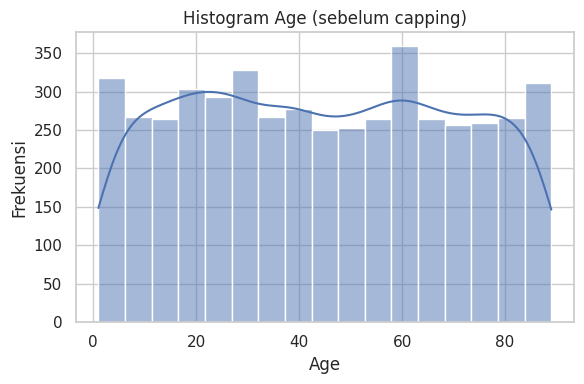

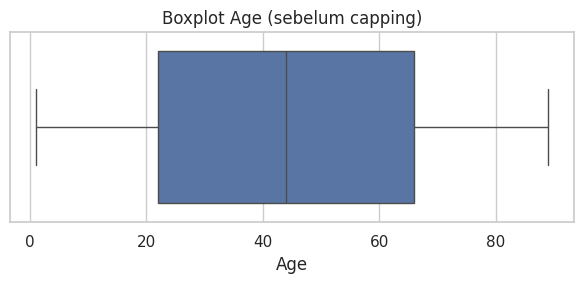

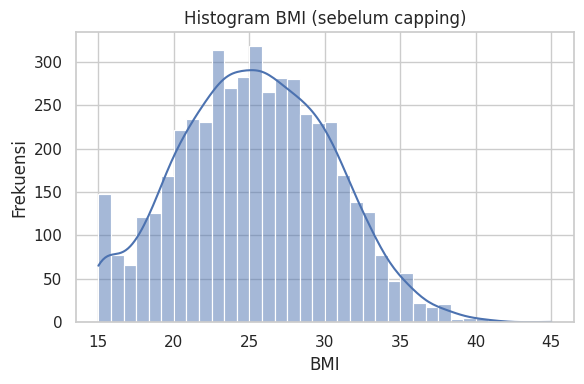

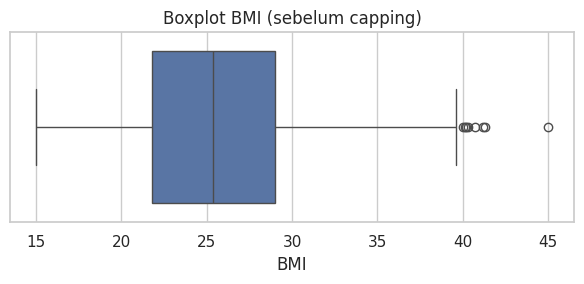

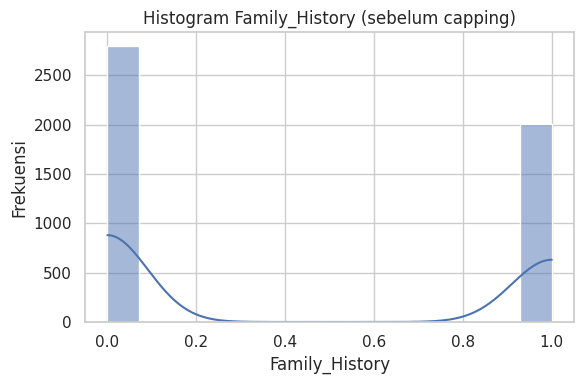

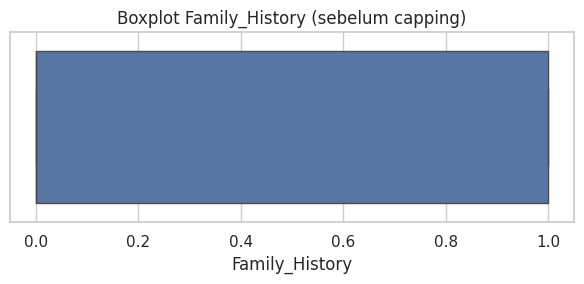

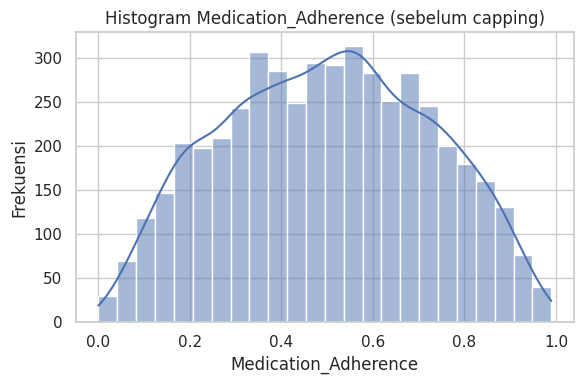

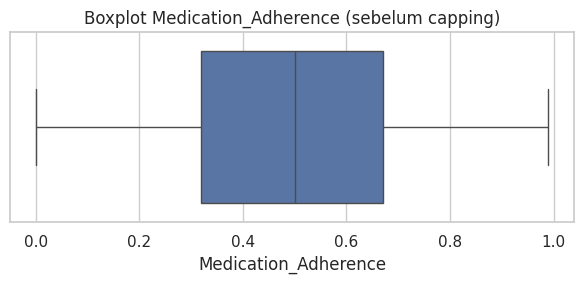

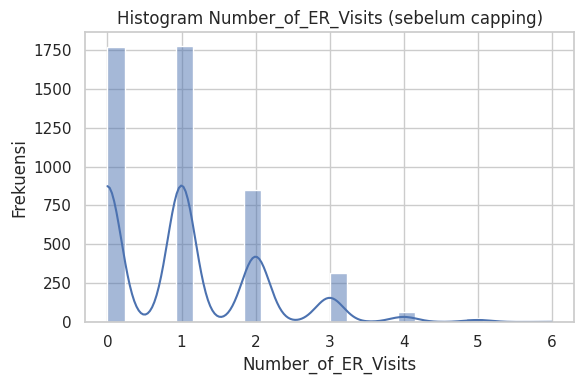

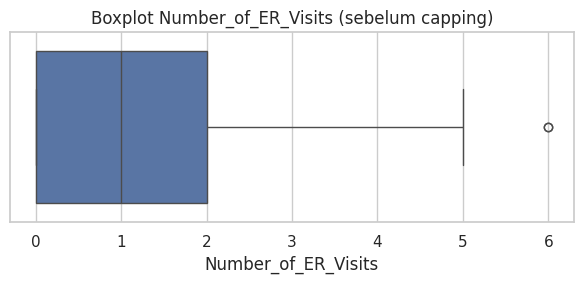

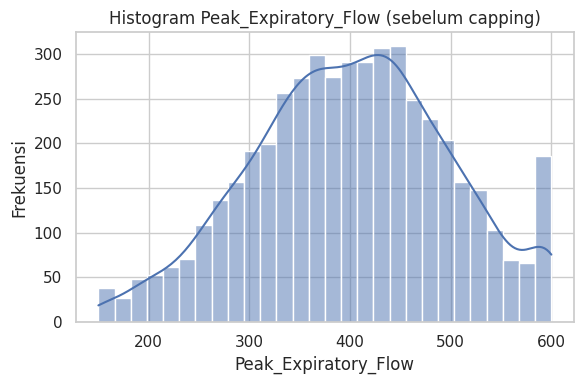

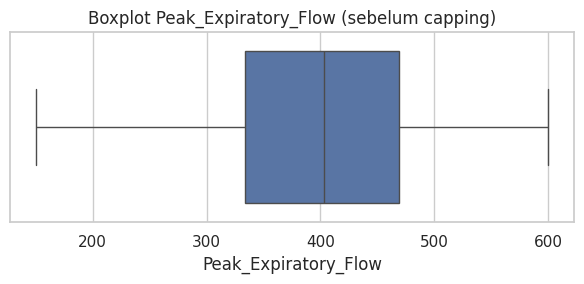

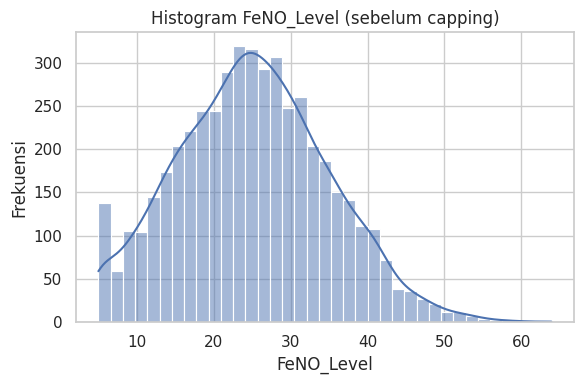

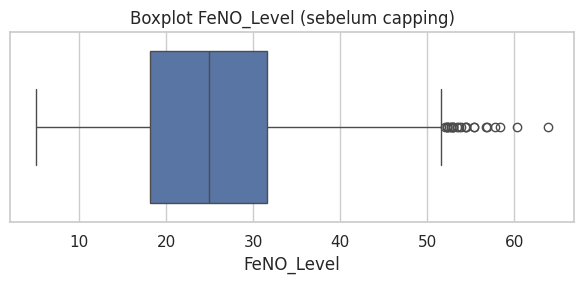

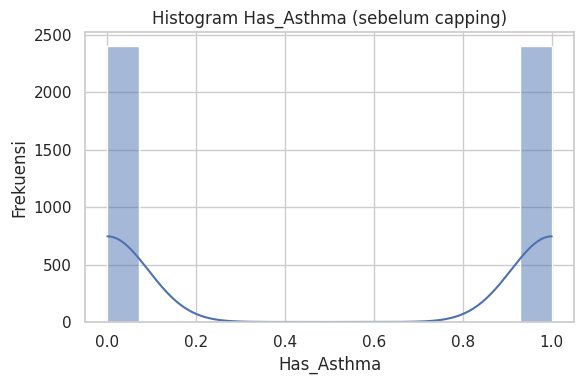

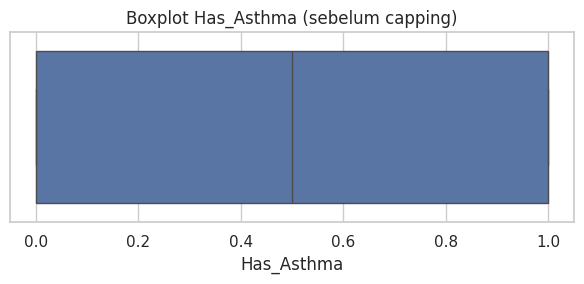

Outlier berhasil ditangani dengan metode capping (IQR)
Outlier SEBELUM capping:
BMI                     8
Number_of_ER_Visits     2
FeNO_Level             24
dtype: int64

Outlier SETELAH capping:
Series([], dtype: int64)

=== Grafik distribusi & outlier SETELAH capping ===


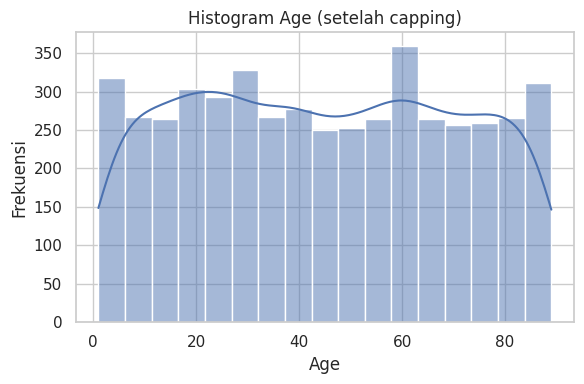

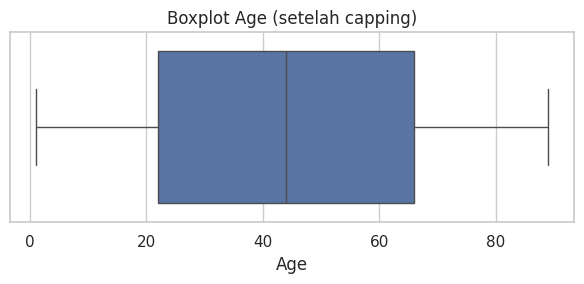

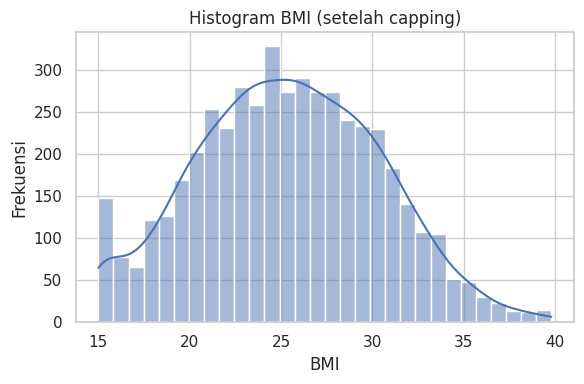

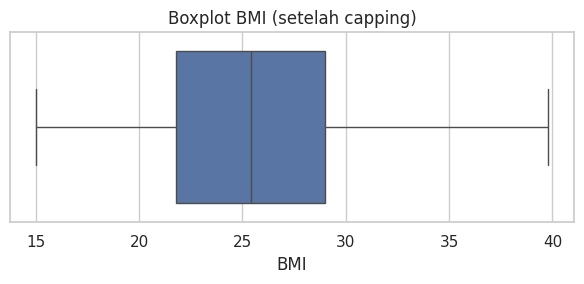

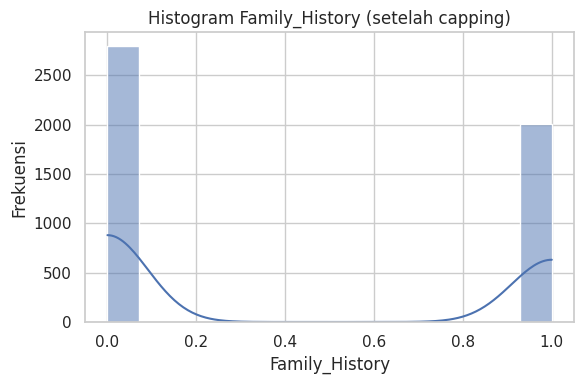

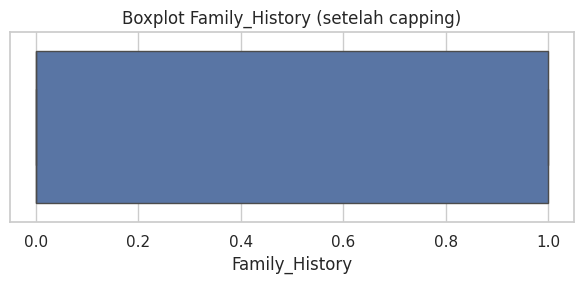

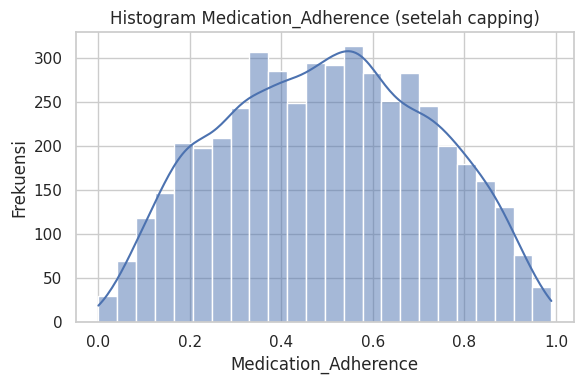

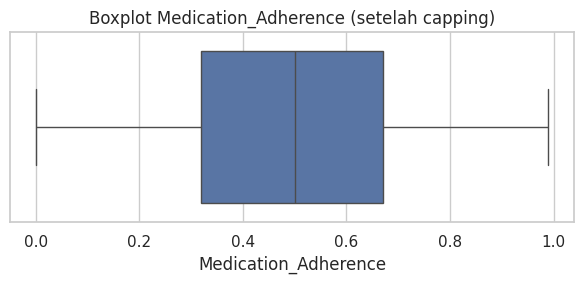

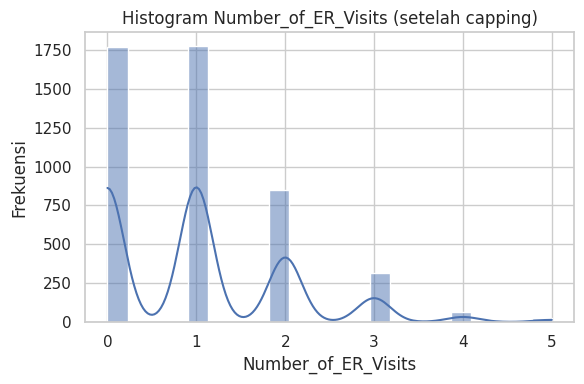

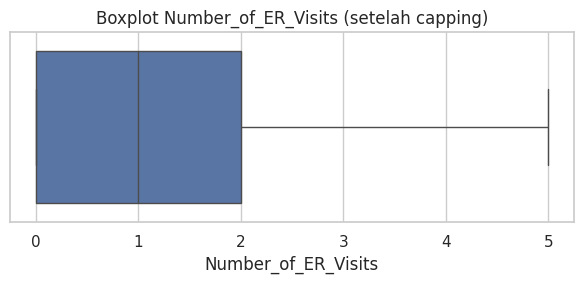

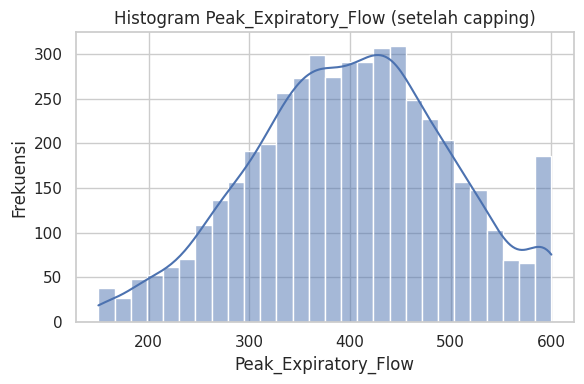

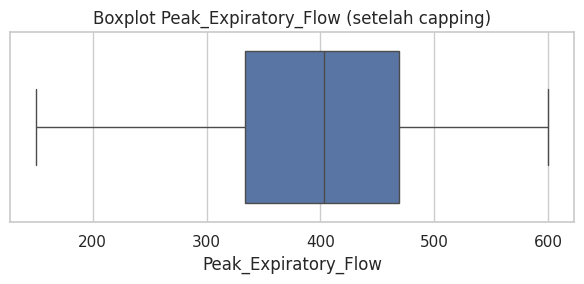

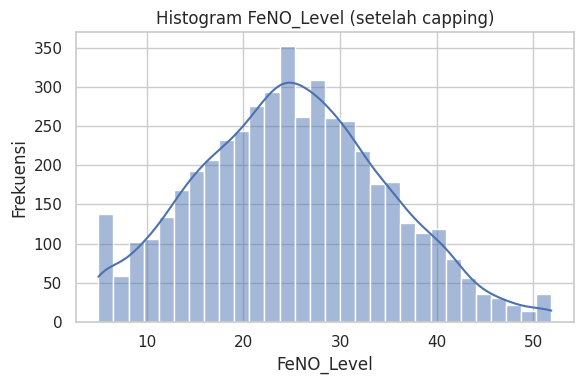

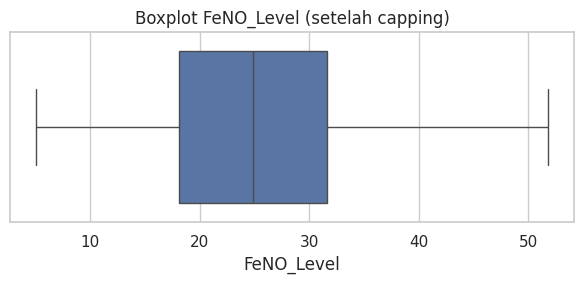

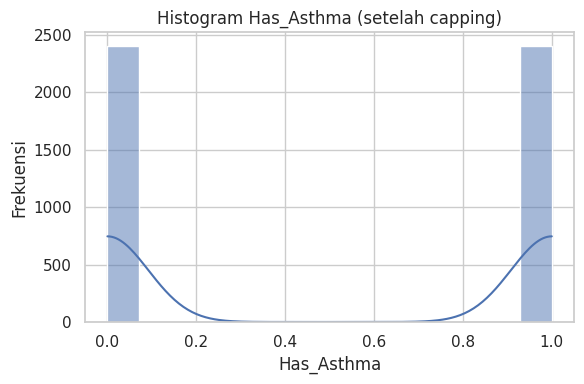

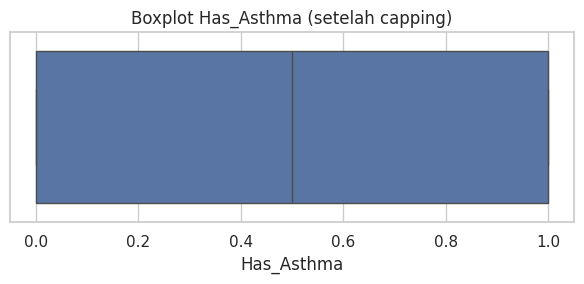

Ukuran data setelah outlier dihapus: (4766, 16)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ASMAdataset_no_duplicates.csv" , sep=';')

# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# ==============================
# DETEKSI OUTLIER DENGAN IQR
# ==============================
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Jumlah outlier per kolom
outlier_count = outlier_mask.sum()
outlier_count[outlier_count > 0]

# Tampilkan Baris yang Mengandung Outlier
rows_with_outlier = df[outlier_mask.any(axis=1)]
print("Jumlah baris mengandung outlier:", rows_with_outlier.shape[0])
rows_with_outlier.head()


# ==============================
# GRAFIK DISTRIBUSI & OUTLIER SEBELUM CAPPING
# ==============================
print("\n=== Grafik distribusi & outlier SEBELUM capping ===")
for col in numeric_cols:
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram {col} (sebelum capping)")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col} (sebelum capping)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# ==============================
# MENANGANI OUTLIER DENGAN CAPPING (IQR)
# ==============================

df_capped = df.copy()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numeric_cols:
    df_capped[col] = np.where(
        df_capped[col] < lower_bound[col],
        lower_bound[col],
        np.where(
            df_capped[col] > upper_bound[col],
            upper_bound[col],
            df_capped[col]
        )
    )
print("Outlier berhasil ditangani dengan metode capping (IQR)")

# Cek ulang outlier setelah capping
outlier_mask_after = (
    (df_capped[numeric_cols] < lower_bound) |
    (df_capped[numeric_cols] > upper_bound)
)
outlier_mask_after.sum()[outlier_mask_after.sum() > 0]

#outlier sebelum capping
print("Outlier SEBELUM capping:")
print(outlier_mask.sum()[outlier_mask.sum() > 0])

#outlier sesudah capping
print("\nOutlier SETELAH capping:")
print(outlier_mask_after.sum()[outlier_mask_after.sum() > 0])


# ==============================
# GRAFIK DISTRIBUSI & OUTLIER SETELAH CAPPING
# ==============================
print("\n=== Grafik distribusi & outlier SETELAH capping ===")
for col in numeric_cols:
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df_capped[col], kde=True)
    plt.title(f"Histogram {col} (setelah capping)")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_capped[col])
    plt.title(f"Boxplot {col} (setelah capping)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



# Hapus Outlier + Simpan Dataset
df_no_outlier = df[~outlier_mask.any(axis=1)]
print("Ukuran data setelah outlier dihapus:", df_no_outlier.shape)
df_no_outlier.to_csv("/content/ASMAdataset_no_outlier.csv", index=False)



In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# ==============================
# DATA TRANSFORMATION
# ==============================

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ASMAdataset_no_outlier.csv", sep=",")
df.columns = df.columns.str.strip()

# Drop ID
if "Patient_ID" in df.columns:
    df = df.drop(columns=["Patient_ID"])

# Cek data
print("Shape:", df.shape)
print("Kolom:", df.columns.tolist())
display(df.head())

target_col = "Has_Asthma"

# =========================
# 1) ENKODING KATEGORIKAL
# =========================
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c != target_col]
encoders = {}
df_enc = df.copy()

for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    encoders[col] = le

# CEK ENCODING
print("Kolom kategorikal (encoded):", cat_cols)
display(df_enc.head())

# =========================
# 2) MIN-MAX SCALING
# =========================
X_cols = [c for c in df_enc.columns if c != target_col]
scaler = MinMaxScaler()

df_final = df_enc.copy()
df_final[X_cols] = scaler.fit_transform(df_enc[X_cols])

# CEK MIN-MAX
print("Range min (fitur):", df_final[X_cols].min().min())
print("Range max (fitur):", df_final[X_cols].max().max())
display(df_final.head())

print("Final shape:", df_final.shape)

# Simpan dataset hasil data transformation
df_final.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/ASMAdataset_TRANSFORMED.csv",
    index=False
)

print("Dataset siap modelling berhasil disimpan.")

Shape: (4766, 15)
Kolom: ['Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma']


,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,57,Female,25.2,Never,1,Pollen,Moderate,Sedentary,Indoor,Never,0.17,0,332.8,5.0,1
1,59,Other,29.2,Former,0,Never,Moderate,Sedentary,Outdoor,Never,0.46,0,333.3,29.6,0
2,32,Female,30.3,Current,0,Never,Moderate,Sedentary,Indoor,Diabetes,0.62,2,446.3,26.1,0
3,3,Female,22.5,Never,0,Pollen,High,Moderate,Indoor,Never,0.71,0,327.5,23.0,0
4,6,Male,24.5,Never,0,Pollen,High,Sedentary,Indoor,Diabetes,0.57,1,248.0,18.1,1


Kolom kategorikal (encoded): ['Gender', 'Smoking_Status', 'Allergies', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities']


,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,57,0,25.2,2,1,4,2,2,0,3,0.17,0,332.8,5.0,1
1,59,2,29.2,1,0,2,2,2,1,3,0.46,0,333.3,29.6,0
2,32,0,30.3,0,0,2,2,2,0,1,0.62,2,446.3,26.1,0
3,3,0,22.5,2,0,4,0,1,0,3,0.71,0,327.5,23.0,0
4,6,1,24.5,2,0,4,0,2,0,1,0.57,1,248.0,18.1,1


Range min (fitur): 0.0
Range max (fitur): 1.0


,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,0.636364,0.0,0.414634,1.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.171717,0.0,0.406222,0.000000,1
1,0.659091,1.0,0.577236,0.5,0.0,0.5,1.0,1.0,1.0,1.000000,0.464646,0.0,0.407333,0.527897,0
2,0.352273,0.0,0.621951,0.0,0.0,0.5,1.0,1.0,0.0,0.333333,0.626263,0.4,0.658444,0.452790,0
3,0.022727,0.0,0.304878,1.0,0.0,1.0,0.0,0.5,0.0,1.000000,0.717172,0.0,0.394444,0.386266,0
4,0.056818,0.5,0.386179,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.575758,0.2,0.217778,0.281116,1


Final shape: (4766, 15)
Dataset siap modelling berhasil disimpan.


Shape: (4766, 15)
Kolom: ['Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma']


,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,0.636364,0.0,0.414634,1.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.171717,0.0,0.406222,0.000000,1
1,0.659091,1.0,0.577236,0.5,0.0,0.5,1.0,1.0,1.0,1.000000,0.464646,0.0,0.407333,0.527897,0
2,0.352273,0.0,0.621951,0.0,0.0,0.5,1.0,1.0,0.0,0.333333,0.626263,0.4,0.658444,0.452790,0
3,0.022727,0.0,0.304878,1.0,0.0,1.0,0.0,0.5,0.0,1.000000,0.717172,0.0,0.394444,0.386266,0
4,0.056818,0.5,0.386179,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.575758,0.2,0.217778,0.281116,1



Distribusi kelas target (Has_Asthma):
Has_Asthma
0    2387
1    2379
Name: count, dtype: int64


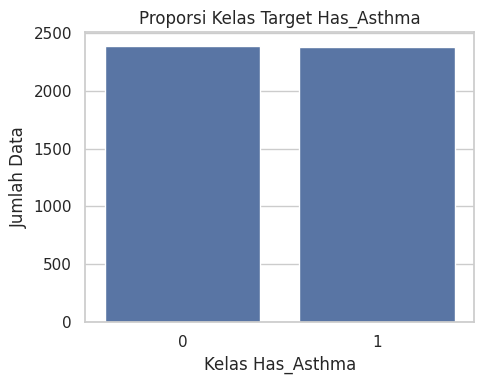

,Feature,Chi-Square Score,P-Value
4,Family_History,542.829829,4.568905e-120
6,Air_Pollution_Level,178.400683,1.082990e-40
7,Physical_Activity_Level,97.817723,4.587234e-23
3,Smoking_Status,80.599818,2.763849e-19
2,BMI,4.818560,2.815485e-02
8,Occupation_Type,1.346025,2.459743e-01
11,Number_of_ER_Visits,0.444173,5.051149e-01
5,Allergies,0.145408,7.029631e-01
0,Age,0.034720,8.521835e-01
12,Peak_Expiratory_Flow,0.022257,8.814052e-01


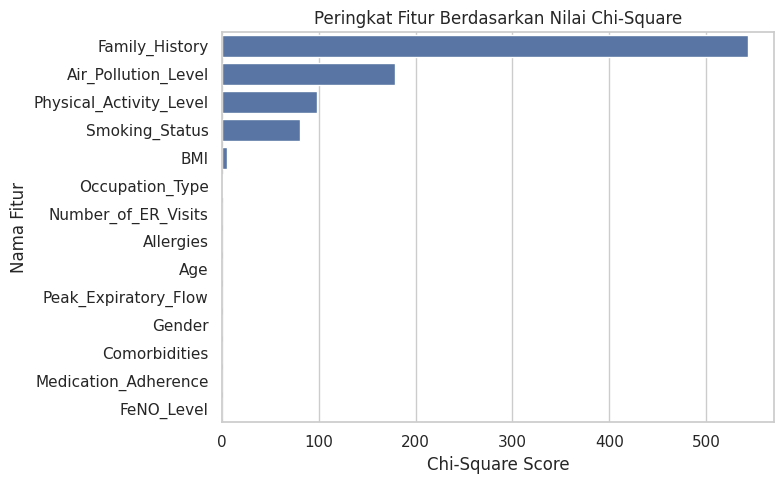


Fitur terpilih: ['BMI', 'Smoking_Status', 'Family_History', 'Air_Pollution_Level', 'Physical_Activity_Level']
Dataset final siap modeling berhasil disimpan.


In [38]:
# ==============================
# DATA REDUCTION
# ==============================

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

path = "/content/drive/MyDrive/Colab Notebooks/ASMAdataset_TRANSFORMED.csv"

df = pd.read_csv(path, sep=",")

print("Shape:", df.shape)
print("Kolom:", df.columns.tolist())
display(df.head())

# Pisahkan fitur & target
X = df.drop("Has_Asthma", axis=1)
y = df["Has_Asthma"]



# ==============================
# GRAFIK PROPORSI KELAS TARGET (Has_Asthma)
# ==============================
print("\nDistribusi kelas target (Has_Asthma):")
print(y.value_counts())

plt.figure(figsize=(5, 4))
value_counts = y.value_counts()
sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)
plt.title("Proporsi Kelas Target Has_Asthma")
plt.xlabel("Kelas Has_Asthma")
plt.ylabel("Jumlah Data")
plt.tight_layout()
plt.show()



# Chi-square feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X, y)

feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi-Square Score": selector.scores_,
    "P-Value": selector.pvalues_
}).sort_values(by="Chi-Square Score", ascending=False)

display(feature_scores)



# ==============================
# GRAFIK RANKING FITUR BERDASARKAN CHI-SQUARE
# ==============================
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_scores,
    x="Chi-Square Score",
    y="Feature"
)
plt.title("Peringkat Fitur Berdasarkan Nilai Chi-Square")
plt.xlabel("Chi-Square Score")
plt.ylabel("Nama Fitur")
plt.tight_layout()
plt.show()

selected_features = X.columns[selector.get_support()]
print("\nFitur terpilih:", selected_features.tolist())


# Simpan dataset hasil data reduction
df_selected = df[selected_features.tolist() + ["Has_Asthma"]]
df_selected.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/ASMAdataset_ready_for_modeling.csv",
    index=False
)

print("Dataset final siap modeling berhasil disimpan.")


In [39]:
# ==============================
# MODELING - KNN
# ==============================

# Import library yang digunakan untuk modeling
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# ==============================
# 1. LOAD DATASET FINAL
# ==============================

path = "/content/drive/MyDrive/Colab Notebooks/ASMAdataset_ready_for_modeling.csv"

df = pd.read_csv(path, sep=",")
print("Shape dataset final:", df.shape)
print("Kolom:", df.columns.tolist())
display(df.head())

# Pisahkan fitur (X) dan target (y)
target_col = "Has_Asthma"

X = df.drop(columns=[target_col])
y = df[target_col]

print("\nShape X:", X.shape)
print("Shape y:", y.shape)
print("Distribusi kelas target:")
print(y.value_counts())


Shape dataset final: (4766, 6)
Kolom: ['BMI', 'Smoking_Status', 'Family_History', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Has_Asthma']


,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Has_Asthma
0,0.414634,1.0,1.0,1.0,1.0,1
1,0.577236,0.5,0.0,1.0,1.0,0
2,0.621951,0.0,0.0,1.0,1.0,0
3,0.304878,1.0,0.0,0.0,0.5,0
4,0.386179,1.0,0.0,0.0,1.0,1



Shape X: (4766, 5)
Shape y: (4766,)
Distribusi kelas target:
Has_Asthma
0    2387
1    2379
Name: count, dtype: int64


In [40]:
# ==============================
# 2. SPLIT DATA TRAINING & TESTING
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% data untuk testing
    random_state=42,     # agar hasil konsisten
    stratify=y           # membagi dengan proporsi kelas yang sama
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (3812, 5)
Shape X_test : (954, 5)
Shape y_train: (3812,)
Shape y_test : (954,)



Hasil pengujian nilai K:


,K,Mean_CV_Accuracy
0,1,0.913168
1,2,0.876178
2,3,0.940186
3,4,0.934940
4,5,0.942548
5,6,0.939923
6,7,0.944909
7,8,0.938613
8,9,0.943074
9,10,0.940975



Nilai K terbaik: 7
Akurasi rata-rata (CV) pada K terbaik: 0.9449


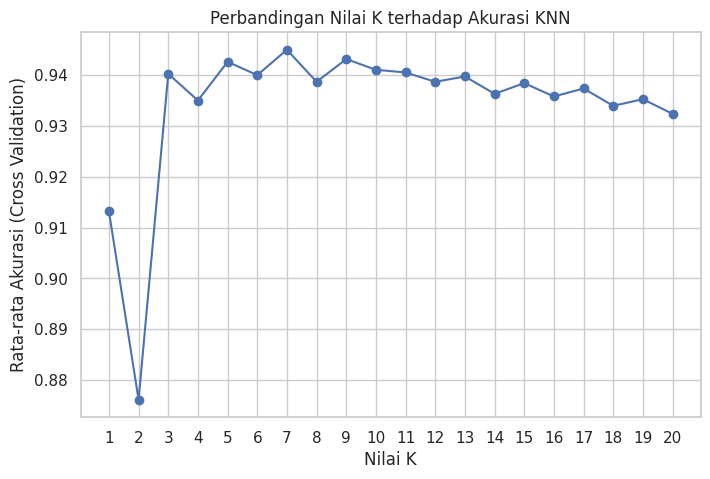

In [41]:
# ==============================
# 3. MENCARI NILAI K TERBAIK
# ==============================

k_values = range(1, 21)   # uji K dari 1 sampai 20
cv_scores = []            # menyimpan rata-rata akurasi cross validation

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross validation pada data training
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

# Buat tabel hasil K vs akurasi
results_k = pd.DataFrame({
    "K": list(k_values),
    "Mean_CV_Accuracy": cv_scores
})

print("\nHasil pengujian nilai K:")
display(results_k)

# Tentukan K terbaik (akurasi tertinggi)
best_index = np.argmax(cv_scores)
best_k = k_values[best_index]
best_score = cv_scores[best_index]

print(f"\nNilai K terbaik: {best_k}")
print(f"Akurasi rata-rata (CV) pada K terbaik: {best_score:.4f}")

# ==============================
# GRAFIK NILAI K vs AKURASI
# ==============================

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(list(k_values), cv_scores, marker='o', linestyle='-')
plt.xticks(list(k_values))
plt.xlabel("Nilai K")
plt.ylabel("Rata-rata Akurasi (Cross Validation)")
plt.title("Perbandingan Nilai K terhadap Akurasi KNN")
plt.grid(True)
plt.show()



In [42]:
# ==============================
# 4. TRAINING MODEL KNN
# ==============================

# Inisialisasi model dengan K terbaik
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Latih model menggunakan data training
knn_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = knn_model.predict(X_test)


Akurasi pada data testing: 0.9434

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       478
           1       0.91      0.99      0.95       476

    accuracy                           0.94       954
   macro avg       0.95      0.94      0.94       954
weighted avg       0.95      0.94      0.94       954


Confusion Matrix:
[[429  49]
 [  5 471]]


,Pred_Negative,Pred_Positive
Actual_Negative,429,49
Actual_Positive,5,471


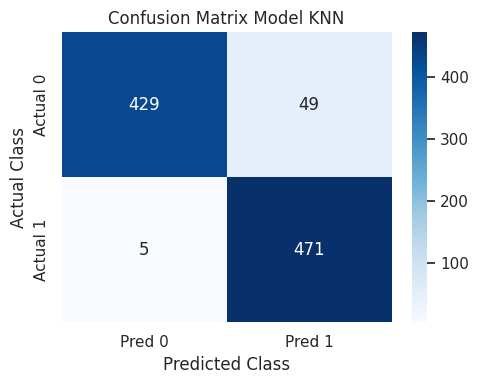

In [43]:
# ==============================
# EVALUASI MODEL
# ==============================

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data testing: {acc:.4f}")

# Classification report (precision, recall, f1 per kelas)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Jika ingin buat DataFrame biar rapi di laporan:
cm_df = pd.DataFrame(
    cm,
    index=["Actual_Negative", "Actual_Positive"],
    columns=["Pred_Negative", "Pred_Positive"]
)

display(cm_df)

# ==============================
# 5b. VISUALISASI CONFUSION MATRIX (HEATMAP)
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan urutan label sesuai kelas di data
labels = sorted(y.unique())  # misal: ['No', 'Yes'] atau [0, 1]

cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[f"Pred {lbl}" for lbl in labels],
    yticklabels=[f"Actual {lbl}" for lbl in labels]
)

plt.title("Confusion Matrix Model KNN")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.tight_layout()
plt.show()



In [44]:
# ==============================
# SIMPAN MODEL UNTUK DEPLOYMENT
# ==============================

import joblib

model_path = "/content/drive/MyDrive/Colab Notebooks/KNN_asthma_model.pkl"
joblib.dump(knn_model, model_path)

print(f"Model KNN berhasil disimpan di: {model_path}")


Model KNN berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/KNN_asthma_model.pkl


In [45]:
import joblib

# pastikan selected_features masih ada (dari Chi-Square)
# selected_features = X.columns[selector.get_support()]

artifact = {
    "model": knn_model,
    "scaler": scaler,
    "encoders": encoders,
    "selected_features": selected_features.tolist(),  # 5 fitur hasil chi-square
}

joblib.dump(artifact, "asthma_knn_artifact.pkl")
print("Artifact deployment tersimpan: asthma_knn_artifact.pkl")
print("Selected features:", artifact["selected_features"])


Artifact deployment tersimpan: asthma_knn_artifact.pkl
Selected features: ['BMI', 'Smoking_Status', 'Family_History', 'Air_Pollution_Level', 'Physical_Activity_Level']


In [46]:
import joblib
joblib.dump(knn_model, "knn_asthma_model.pkl")


['knn_asthma_model.pkl']

In [47]:
import sklearn
print(sklearn.__version__)


1.6.1
